## Passende Bibliotheken einbinden

Diese braucht es für die 3D Darstellung

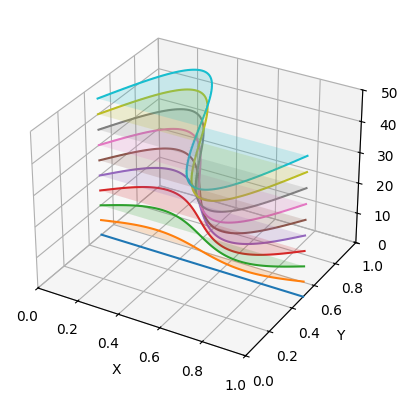

In [25]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(projection="3d")

def plot2din3d(x,y,z):
    ax.plot(x, y, zs=z, zdir="z")
    _2d_col_obj = ax.fill_between(x, 0.5, y, step='pre', alpha=0.1) 
    ax.add_collection3d(_2d_col_obj, zs = z, zdir = 'z')

for z in range(0, 50, 5):
    x = np.linspace(0, 1, 100)
    y = z * np.sin(x * 2 * np.pi) / 50 / 2 + 0.5
    plot2din3d(x, y, z)

#ax.legend()
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_zlim(0, 50)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")

# ax.view_init(elev=20., azim=-35)

plt.show()

Daten generieren

(-1.0, 1.0)

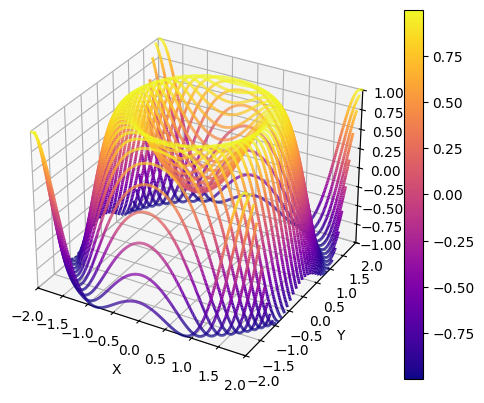

In [3]:
import numpy as np; import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from mpl_toolkits.mplot3d import Axes3D

def waterfall_plot(fig,ax,X,Y,Z):
    '''
    Make a waterfall plot
    Input:
        fig,ax : matplotlib figure and axes to populate
        Z : n,m numpy array. Must be a 2d array even if only one line should be plotted
        X,Y : n,m array
    '''
    # Set normalization to the same values for all plots
    norm = plt.Normalize(Z.min().min(), Z.max().max())
    # Check sizes to loop always over the smallest dimension
    n,m = Z.shape
    if n>m:
        X=X.T; Y=Y.T; Z=Z.T
        m,n = n,m

    for j in range(n):
        # reshape the X,Z into pairs 
        points = np.array([X[j,:], Z[j,:]]).T.reshape(-1, 1, 2)
        segments = np.concatenate([points[:-1], points[1:]], axis=1)        
        lc = LineCollection(segments, cmap='plasma', norm=norm)
        # Set the values used for colormapping
        lc.set_array((Z[j,1:]+Z[j,:-1])/2)
        lc.set_linewidth(2) # set linewidth a little larger to see properly the colormap variation
        line = ax.add_collection3d(lc,zs=(Y[j,1:]+Y[j,:-1])/2, zdir='y') # add line to axes

    fig.colorbar(lc) # add colorbar, as the normalization is the same for all, it doesent matter which of the lc objects we use

# Generate data
x = np.linspace(-2,2, 500)
y = np.linspace(-2,2, 40)
X,Y = np.meshgrid(x,y)
Z = np.sin(X**2+Y**2)
# Generate waterfall plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
waterfall_plot(fig,ax,X,Y,Z) 
ax.set_xlabel('X') ; ax.set_xlim3d(-2,2)
ax.set_ylabel('Y') ; ax.set_ylim3d(-2,2)
ax.set_zlabel('Z') ; ax.set_zlim3d(-1,1)

Legenden setzen und Achsenlimits und Labels

Text(0.10787434422876363, 0.014452421710066976, 'Z')

Betrachtungswinkel anpassen

In [15]:
plt.show()